In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [7]:
#data = pd.read_csv("22140-0003-Data_combined_without_dublicates.csv", delimiter=",")

In [8]:
data = pd.read_csv("22140-0003-Data_combined_without_dublicates.csv", sep=None, engine='python')

In [9]:
data.head()

,RID,ID1,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,testdate,...,SOURCES,LINENUM1,OCC1,OCCLOC1,FRSTYR1,SOURCES1,BACKFIL1,STUDYNUM,YOB,YOB1
0,1,236,-1,1,1,1,28-Feb-1990,01-Jan-1900,01-Jan-1900,09-Mar-1990,...,9,10,"ROOFER,REMODEL-HOME,EX-MAID",HOTEL,2,17,0,1,1964,1962
1,1,236,-1,1,2,1,28-Feb-1990,01-Jan-1900,01-Jan-1900,09-Mar-1990,...,9,10,"ROOFER,REMODEL-HOME,EX-MAID",HOTEL,2,17,0,1,1964,1962
2,1,266,-1,1,1,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,23-Apr-1991,...,9,3,"NEVER WORKED IN LIFE, PRO",,1,31,1,1,1964,1962
3,1,266,-1,1,2,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,23-Apr-1991,...,9,3,"NEVER WORKED IN LIFE, PRO",,1,31,1,1,1964,1962
4,1,266,-1,1,3,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,23-Apr-1991,...,9,3,"NEVER WORKED IN LIFE, PRO",,1,31,1,1,1964,1962


In [10]:
data_new = data[["RID"
,"ID1"
,"TIETYPE"
,"testdate"
,"testdat1"
,"SAMPLE"
,"SG"
,"SG1"
,"NTYPE1"
,"FRSTTYPE"
,"FRSTTYP1"
,"RACE"
,"RACE1"
,"SEX"
,"SEX1"
,"ORIENT"
,"ORIENT1"
,"BEHAV"
,"BEHAV1"
,"AGE"
,"AGE1"
,"PRO"
,"PRO1"
,"JOHN"
,"JOHN1"
,"DEALER"
,"DEALER1"
,"THIEF"
,"THIEF1"
,"RETIRED"
,"RETIRED1"
,"HWIFE"
,"HWIFE1"
,"DISABLE"
,"DISABLE1"
,"UNEMP"
,"UNEMP1"
,"STREETS"
,"STREETS1"
,"EDUC"
,"EDUC1"
,"SYPH"
,"SYPH1"
,"HIV"
,"HIV1"
,"OCC"
,"OCC1"
,"YOB"
,"YOB1"]].copy()


In [11]:
data_new.head()

,RID,ID1,TIETYPE,testdate,testdat1,SAMPLE,SG,SG1,NTYPE1,FRSTTYPE,...,EDUC,EDUC1,SYPH,SYPH1,HIV,HIV1,OCC,OCC1,YOB,YOB1
0,1,236,1,09-Mar-1990,28-Aug-1989,1,0,0,1,1,...,-9,-9,0,0,0,0,"FORMER EXOTIC DANCER, PRO","ROOFER,REMODEL-HOME,EX-MAID",1964,1962
1,1,236,2,09-Mar-1990,28-Aug-1989,1,0,0,1,1,...,-9,-9,0,0,0,0,"FORMER EXOTIC DANCER, PRO","ROOFER,REMODEL-HOME,EX-MAID",1964,1962
2,1,266,1,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,-9,-8,0,0,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962
3,1,266,2,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,-9,-8,0,0,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962
4,1,266,3,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,-9,-8,0,0,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962


## Create new columns for different connection types 1-4

In [12]:
data_expand = data_new.copy()

for t in range(1, 5):  # Assuming TIETYPE values range from 1 to 4
    data_expand[f'TIETYPE{t}'] = 0

# Set the corresponding TIETYPE column to 1 for each row's TIETYPE value
for idx, row in data_expand.iterrows():
    tietype = row['TIETYPE']
    data_expand.at[idx, f'TIETYPE{tietype}'] = 1


data_expand.head()

,RID,ID1,TIETYPE,testdate,testdat1,SAMPLE,SG,SG1,NTYPE1,FRSTTYPE,...,HIV,HIV1,OCC,OCC1,YOB,YOB1,TIETYPE1,TIETYPE2,TIETYPE3,TIETYPE4
0,1,236,1,09-Mar-1990,28-Aug-1989,1,0,0,1,1,...,0,0,"FORMER EXOTIC DANCER, PRO","ROOFER,REMODEL-HOME,EX-MAID",1964,1962,1,0,0,0
1,1,236,2,09-Mar-1990,28-Aug-1989,1,0,0,1,1,...,0,0,"FORMER EXOTIC DANCER, PRO","ROOFER,REMODEL-HOME,EX-MAID",1964,1962,0,1,0,0
2,1,266,1,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962,1,0,0,0
3,1,266,2,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962,0,1,0,0
4,1,266,3,23-Apr-1991,24-Jan-1991,1,0,11,1,1,...,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962,0,0,1,0


In [13]:
# First, get the unique combinations of RID and ID1
unique_combinations = data_expand.groupby(['RID', 'ID1'])
 
# Initialize the TIETYPE binary columns with 0
for t in range(1, 5):  # Assuming TIETYPE values range from 1 to 4
    data_expand[f'TIETYPE{t}'] = 0
 
# Loop through each unique combination and set the TIETYPE columns based on the values of TIETYPE
for (rid, id1), group in unique_combinations:
    types = group['TIETYPE'].unique()  # Get unique TIETYPE values for the group
    for t in types:
        if t in range(1, 5):  # Check if t is within the expected range
            data_expand.loc[(data_expand['RID'] == rid) & (data_expand['ID1'] == id1), f'TIETYPE{t}'] = 1
 
# Check the result
data_expand.drop(columns=["TIETYPE"], inplace=True)
data_expand.drop_duplicates(inplace=True)
data_expand.head()

,RID,ID1,testdate,testdat1,SAMPLE,SG,SG1,NTYPE1,FRSTTYPE,FRSTTYP1,...,HIV,HIV1,OCC,OCC1,YOB,YOB1,TIETYPE1,TIETYPE2,TIETYPE3,TIETYPE4
0,1,236,09-Mar-1990,28-Aug-1989,1,0,0,1,1,3,...,0,0,"FORMER EXOTIC DANCER, PRO","ROOFER,REMODEL-HOME,EX-MAID",1964,1962,1,1,0,0
2,1,266,23-Apr-1991,24-Jan-1991,1,0,11,1,1,3,...,0,0,"FORMER EXOTIC DANCER, PRO","NEVER WORKED IN LIFE, PRO",1964,1962,1,1,1,0
5,1,283,23-Apr-1991,30-Apr-1990,1,0,0,1,1,3,...,0,0,"FORMER EXOTIC DANCER, PRO","FORMER CLERK, PRO, DDEALER",1964,1971,1,1,1,0
8,1,337,09-Mar-1990,30-Jan-1990,1,0,0,1,1,3,...,0,-8,"FORMER EXOTIC DANCER, PRO",PRO,1964,1960,1,1,0,0
10,1,618,23-Apr-1991,30-Apr-1990,1,0,0,1,1,3,...,0,0,"FORMER EXOTIC DANCER, PRO","FORMER CLERK,PRO,PIMP,DDEALER",1964,1964,1,1,1,0


## Create seperate graphs for each connection type

In [14]:
G_1 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE1")
G_2 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE2")
G_3 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE3")
G_4 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE4")

node_attributes = {}

race_mapping = {
    -9: "OOD",
    1: "Amer Indian",
    2: "Black",
    3: "Asian/Plsle",
    4: "White",
    5: "Other",
}

education_mapping = {
    -9: "OOD",
    -8: "ID",
    -6: "Don't know",
    2: "Minimal",
    3: "Minimal",
    4: "Minimal",
    5: "Minimal",
    6: "Elementary",
    7: "Elementary",
    8: "Elementary",
    9: "Junior High",
    10: "Junior High",
    11: "Junior High",
    12: "High/GED",
    13: "Freshman Col",
    14: "Trade School",
    15: "Undergrad",
    16: "Collage Grad",
    17: "Post Grad",
    18: "Post Grad",
    19: "Post Grad",
    21: "Undefined Code",
    23: "Undefined Code",
}

HIV_mapping = {
    -9: "OOD",
    -8: "No Test",
    0: "Negative",
    1: "Positive",
}

for _, row in data_expand.iterrows():
    rid = row['RID']
    id1 = row['ID1']
    
    node_attributes[rid] = {
        "HIV_status": HIV_mapping.get(row["HIV"]),
        "Race": race_mapping.get(row["RACE"]),
        "Sex": "Male" if row["SEX"] == 1 else "Female",
        "Age": row["AGE"],
        "Education level": education_mapping.get(row["EDUC"]),
        "Syphilis_status": "Positive" if row["SYPH"] == 1 else "Negative",
        "Profession": row["OCC"],
        }
    
    node_attributes[id1] = {
        "HIV_status": HIV_mapping.get(row["HIV1"]),
        "Race": race_mapping.get(row["RACE1"]),
        "Sex": "Male" if row["SEX1"] == 1 else "Female",
        "Age": row["AGE1"],
        "Education level": education_mapping.get(row["EDUC1"]),
        "Syphilis_status": "Positive" if row["SYPH1"] == 1 else "Negative",
        "Profession": row["OCC1"],
        }

nx.set_node_attributes(G_1, node_attributes)
nx.set_node_attributes(G_2, node_attributes)
nx.set_node_attributes(G_3, node_attributes)
nx.set_node_attributes(G_4, node_attributes)

### Remove edges where the connection type doesn't match the graph

In [15]:
graphs = {i: globals()[f'G_{i}'] for i in range(1, 5)}  # Store reference to each graph

for i in range(1,5):
    edges_to_remove = []
    G = graphs[i]
    for u, v, attr in G.edges(data=True):
        if attr.get(f"TIETYPE{i}", 0) == 0: 
            edges_to_remove.append((u, v)) 

    for u, v in edges_to_remove:
        G.remove_edge(u, v)

## Extrapolate the probability estimates

### The 4 different connection types
1 -> Social <br>
2 -> Drugs <br>
3 -> Sexual <br>
4 -> Needle

In [16]:
# transmission_probability = {}

# for i in range(1, 5):
#     G = graphs[i]
#     transmission_events = 0
#     total_interactions_with_positive = 0
    
#     for u, v in G.edges():
#         u_status = G.nodes[u].get("HIV_status")
#         v_status = G.nodes[v].get("HIV_status")
        
#         if u_status in ["Positive", "Negative"] and v_status in ["Positive", "Negative"]:
#             if u_status == "Positive" or v_status == "Positive":
#                 total_interactions_with_positive += 1
                
#                 if u_status == "Positive" and v_status == "Positive":
#                     transmission_events += 1       

#     # Calculate probability of transmission per interaction with positive HIV status
#     transmission_probability[i] = (transmission_events / total_interactions_with_positive 
#                                    if total_interactions_with_positive > 0 else 0)

# print(transmission_probability)

In [17]:
# transmission_probability2 = {}

# for i in range(1, 3):
#     G = graphs[i]
#     sexG = graphs[3]
#     needleG = graphs[4]

#     transmission_events = 0
#     total_interactions_with_positive = 0
    
#     for u, v in G.edges():
#         u_status = G.nodes[u].get("HIV_status")
#         v_status = G.nodes[v].get("HIV_status")
        
#         if u_status in ["Positive", "Negative"] and v_status in ["Positive", "Negative"]:
#             if u_status == "Positive" or v_status == "Positive":
#                 if (u, v) not in sexG.edges() and (v, u) not in sexG.edges() and (u, v) not in needleG.edges() and (v, u) not in needleG.edges():
#                     total_interactions_with_positive += 1                
#                     if u_status == "Positive" and v_status == "Positive":
#                         transmission_events += 1       
#     print(total_interactions_with_positive, transmission_events)
#     # Calculate probability of transmission per interaction with positive HIV status
#     transmission_probability2[i] = (transmission_events / total_interactions_with_positive 
#                                    if total_interactions_with_positive > 0 else 0)

# print(transmission_probability2)
# transmission_probability3 = transmission_probability | transmission_probability2
# print(transmission_probability3)

## Create combined graph with the probabilities

In [18]:
# B = nx.Graph()

# edge_pair_highest_probability = {}
# edge_tietype = {}
# seen_edges = set()

# # Iterate through each graph and update the edge attributes
# for i in range(1, 5):
#     G = graphs[i]
#     for u, v in G.edges():
#         edge = tuple(sorted((u, v)))  # Sort the edge tuple

#         if G.nodes[u].get("Sex") == "Male" and G.nodes[v].get("Sex") == "Male":
#             transmission_probability[3] = 0.0138
#         else:
#             transmission_probability[3] = 0.0008

#         # Update probability using the formula
#         if edge not in seen_edges:
#             edge_pair_highest_probability[edge] = transmission_probability[i]
#             seen_edges.add(edge)
#             edge_tietype[edge] = [i]  # Initialize edge_tietype as a list
#         else:
#             edge_pair_highest_probability[edge] = 1 - (
#                 (1 - edge_pair_highest_probability[edge]) * (1 - transmission_probability[i])
#             )
#             edge_tietype[edge].append(i)  # Append to the existing list

# # Convert keys and values to lists
# keys = list(edge_pair_highest_probability.keys())
# values = list(edge_pair_highest_probability.values())

# # Add edges with attributes
# for i in range(len(keys)):
#     B.add_edge(
#         keys[i][0],
#         keys[i][1],
#         probability=values[i],
#         TIETYPE=edge_tietype[keys[i]],  # Add TIETYPE as a list
#     )

# # Set node attributes
# nx.set_node_attributes(B, node_attributes)

# # Example: Print edges and their attributes
# print("Edges in the graph with attributes:")
# for edge in B.edges(data=True):
#     print(edge)


In [19]:
# tG is the transmission probability of gay sex
def create_graph(t1, t2, t3, t4, tG):
    B = nx.Graph()

    transmission_probability = {1: t1, 2: t2, 3: t3, 4: t4}
    edge_pair_highest_probability = {}
    edge_tietype = {}
    seen_edges = set()

    # Iterate through each graph and update the edge attributes
    for i in range(1, 5):
        G = graphs[i]
        for u, v in G.edges():
            edge = tuple(sorted((u, v)))  # Sort the edge tuple

            if G.nodes[u].get("Sex") == "Male" and G.nodes[v].get("Sex") == "Male":
                transmission_probability[3] = tG
            else:
                transmission_probability[3] = t3

            # Update probability using the formula
            if edge not in seen_edges:
                edge_pair_highest_probability[edge] = transmission_probability[i]
                seen_edges.add(edge)
                edge_tietype[edge] = [i]  # Initialize edge_tietype as a list
            else:
                edge_pair_highest_probability[edge] = 1 - (
                    (1 - edge_pair_highest_probability[edge]) * (1 - transmission_probability[i])
                )
                edge_tietype[edge].append(i)  # Append to the existing list

    # Convert keys and values to lists
    keys = list(edge_pair_highest_probability.keys())
    values = list(edge_pair_highest_probability.values())

    # Add edges with attributes
    for i in range(len(keys)):
        B.add_edge(
            keys[i][0],
            keys[i][1],
            probability=values[i],
            TIETYPE=edge_tietype[keys[i]],  # Add TIETYPE as a list
        )

    # Set node attributes
    nx.set_node_attributes(B, node_attributes)
    return B

# Probabilities for transmission types


### Found from: 
https://www.aidsmap.com/about-hiv/estimated-hiv-risk-exposure

In [20]:
transmission_probability = {1: 0, 2: 0, 3: 0.0008, 4: 0.0063}

# We have not decided about transmission probabilities for t1 and t2.
# Perhaps they could be copies of t3 and t4 respectively but scaled.
# Meaning a social connection could have 10% of becomming sexual etc.

## Creating the graphs with inputs as probabilities

In [21]:
# (tietype1, tietype2, tietype3, tietype4, tietype3 as gay connection)

# G_noX is meant to be the graph without tietype X where weight is set to 0
# Change it meanually as you like

B = create_graph(0, 0, 0.008, 0.0063, 0.0138)
G_no1 = create_graph(0, 0.2, 0.3, 0.4, 0.5)
G_no2 = create_graph(0, 0.2, 0.3, 0.4, 0.5)
G_no3 = create_graph(0, 0.2, 0.3, 0.4, 0.5)
G_no4 = create_graph(0, 0.2, 0.3, 0.4, 0.5)

In [22]:
G_no1.edges(data=True)

EdgeDataView([(1, 236, {'probability': 0.19999999999999996, 'TIETYPE': [1, 2]}), (1, 266, {'probability': 0.6, 'TIETYPE': [1, 2, 3]}), (1, 283, {'probability': 0.6, 'TIETYPE': [1, 2, 3]}), (1, 337, {'probability': 0.19999999999999996, 'TIETYPE': [1, 2]}), (1, 618, {'probability': 0.6, 'TIETYPE': [1, 2, 3]}), (1, 619, {'probability': 0.19999999999999996, 'TIETYPE': [1, 2]}), (1, 880, {'probability': 0.19999999999999996, 'TIETYPE': [1, 2]}), (1, 3453, {'probability': 0.30000000000000004, 'TIETYPE': [1, 3]}), (1, 3454, {'probability': 0.44000000000000006, 'TIETYPE': [1, 2, 3]}), (1, 3455, {'probability': 0, 'TIETYPE': [1]}), (1, 3456, {'probability': 0, 'TIETYPE': [1]}), (1, 5101, {'probability': 0, 'TIETYPE': [1]}), (1, 11740, {'probability': 0.30000000000000004, 'TIETYPE': [1, 3]}), (1, 11741, {'probability': 0.6, 'TIETYPE': [1, 2, 3]}), (1, 12978, {'probability': 0, 'TIETYPE': [1]}), (1, 12979, {'probability': 0, 'TIETYPE': [1]}), (1, 77, {'probability': 0.6, 'TIETYPE': [1, 2, 3]}), (1

Calculate values of nodes properties

In [23]:
# Calculate metrics for each node
degree_centrality = nx.degree_centrality(B)  # Degree Centrality
closeness_centrality = nx.closeness_centrality(B)  # Closeness Centrality
betweenness_centrality = nx.betweenness_centrality(B)  # Betweenness Centrality
pagerank = nx.pagerank(B)  # PageRank

# Combine node attributes with metrics
node_data = []
for node in B.nodes(data=True):
    metrics = {
        "Node": node[0],
        "Degree": degree_centrality[node[0]],
        "Closeness": closeness_centrality[node[0]],
        "Betweenness": betweenness_centrality[node[0]],
        "PageRank": pagerank[node[0]],
    }
    # Combine attributes into the row
    metrics.update(node[1])  # Add all attributes to the metrics dictionary
    node_data.append(metrics)

# Create a DataFrame
node_metrics = pd.DataFrame(node_data)
node_metrics

KeyboardInterrupt: 

In [ ]:
node_metrics.to_excel("target_nodes.xlsx")

In [ ]:
print(graphs)

{1: <networkx.classes.graph.Graph object at 0x0000014AA253EB50>, 2: <networkx.classes.graph.Graph object at 0x0000014AA5869B90>, 3: <networkx.classes.graph.Graph object at 0x0000014AA750F5D0>, 4: <networkx.classes.graph.Graph object at 0x0000014AAF78E090>}


In [ ]:
print(graphs[1].edges())

[(1, 236), (1, 266), (1, 283), (1, 337), (1, 618), (1, 619), (1, 880), (1, 3453), (1, 3454), (1, 3455), (1, 3456), (1, 5101), (1, 11740), (1, 11741), (1, 12978), (1, 12979), (1, 77), (1, 113), (1, 190), (1, 220), (1, 230), (1, 290), (1, 303), (1, 327), (1, 493), (1, 10009), (1, 10010), (1, 10011), (1, 10012), (1, 10013), (1, 10014), (1, 10015), (1, 10016), (1, 10017), (1, 10018), (1, 10019), (1, 10020), (1, 10021), (1, 10022), (1, 10023), (1, 10024), (1, 10025), (1, 10026), (1, 10027), (1, 10028), (1, 10029), (236, 5), (236, 10), (236, 40), (236, 145), (236, 147), (236, 150), (236, 155), (236, 190), (236, 202), (236, 294), (236, 337), (236, 349), (236, 1098), (236, 4208), (236, 4261), (236, 4488), (236, 5461), (236, 5643), (236, 5644), (236, 10464), (236, 10465), (236, 10466), (236, 10467), (236, 10469), (236, 10471), (236, 10472), (236, 10473), (236, 10474), (236, 10475), (236, 10476), (236, 12440), (236, 12441), (236, 13331), (236, 237), (236, 327), (236, 477), (236, 690), (236, 771)

In [ ]:
# Graph with the probability attribute
nx.write_graphml(B, "combined2.graphml")

TypeError: GraphML does not support type <class 'type'> as data values.

In [ ]:
# Print all nodes in the graph
print("Nodes in the graph:")
for node in B.nodes(data=True):  # Include data=True to show node attributes
    print(node)


Nodes in the graph:
(1, {'HIV_status': 'Positive', 'Race': 'Black', 'Sex': 'Male', 'Age': '45', 'Education level': 'ID', 'Syphilis_status': 'Negative', 'Profession': 'missing (out of design)'})
(236, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '27', 'Education level': 'Trade School', 'Syphilis_status': 'Negative', 'Profession': 'ROOFER,REMODEL-HOME,EX-MAID'})
(266, {'HIV_status': 'OOD', 'Race': 'Black', 'Sex': 'Male', 'Age': '26', 'Education level': 'Junior High', 'Syphilis_status': 'Negative', 'Profession': 'NEVER WORKED IN LIFE, PRO'})
(283, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '18', 'Education level': 'Elementary', 'Syphilis_status': 'Negative', 'Profession': 'FORMER CLERK, PRO, DDEALER'})
(337, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '28', 'Education level': 'ID', 'Syphilis_status': 'Negative', 'Profession': 'PRO'})
(618, {'HIV_status': 'Negative', 'Race': 'Black', 'Sex': 'Male', 'Age': '25', 'Education le

In [ ]:
# Print all edges in the graph
print("\nEdges in the graph:")
for edge in B.edges(data=True):  # Include data=True to show edge attributes
    print(edge)


Edges in the graph:
(1, 236, {'probability': 0.4394233805628356})
(1, 266, {'probability': 0.5866017980212417})
(1, 283, {'probability': 0.5866017980212417})
(1, 337, {'probability': 0.4394233805628356})
(1, 618, {'probability': 0.5866017980212417})
(1, 619, {'probability': 0.4394233805628356})
(1, 880, {'probability': 0.4394233805628356})
(1, 3453, {'probability': 0.4440882073390906})
(1, 3454, {'probability': 0.5866017980212417})
(1, 3455, {'probability': 0.24617196702002356})
(1, 3456, {'probability': 0.24617196702002356})
(1, 5101, {'probability': 0.24617196702002356})
(1, 11740, {'probability': 0.4440882073390906})
(1, 11741, {'probability': 0.5866017980212417})
(1, 12978, {'probability': 0.24617196702002356})
(1, 12979, {'probability': 0.24617196702002356})
(1, 77, {'probability': 0.5866017980212417})
(1, 113, {'probability': 0.4394233805628356})
(1, 190, {'probability': 0.5866017980212417})
(1, 220, {'probability': 0.4394233805628356})
(1, 230, {'probability': 0.439423380562835

In [ ]:
nx.write_graphml(G_1, "G_1.graphml")
nx.write_graphml(G_2, "G_2.graphml")
nx.write_graphml(G_3, "G_3.graphml")
nx.write_graphml(G_4, "G_4.graphml")

Main properties of the networks

Properties for G_1 after removing nodes with degree 0:
  Node count: 10734
  Edge count: 13477
  Average degree: 2.5110862679336687
  Density: 0.00023395940258396242
  Average clustering coefficient: 0.03399794205026417



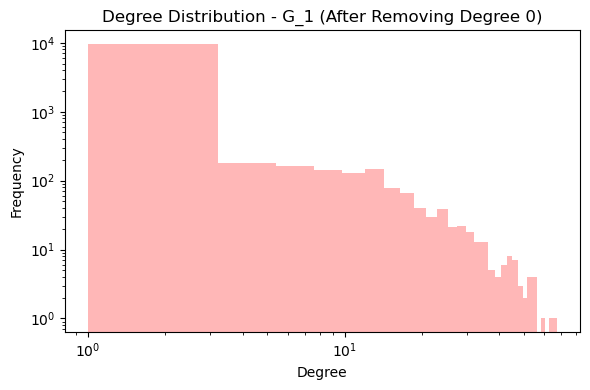

Properties for G_2 after removing nodes with degree 0:
  Node count: 5287
  Edge count: 6355
  Average degree: 2.4040098354454322
  Density: 0.00045478808843084226
  Average clustering coefficient: 0.03541647319974693



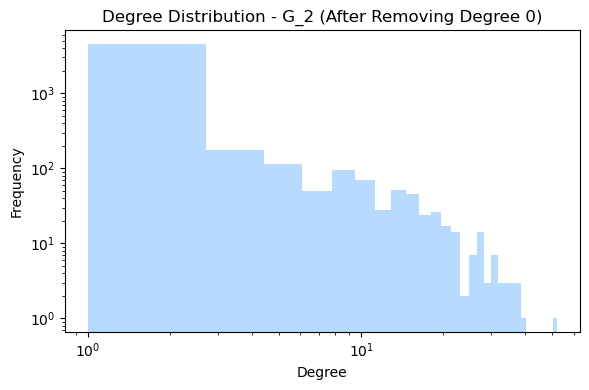

Properties for G_3 after removing nodes with degree 0:
  Node count: 3149
  Edge count: 3247
  Average degree: 2.0622419815814546
  Density: 0.0006550959280754303
  Average clustering coefficient: 0.022163908709307557



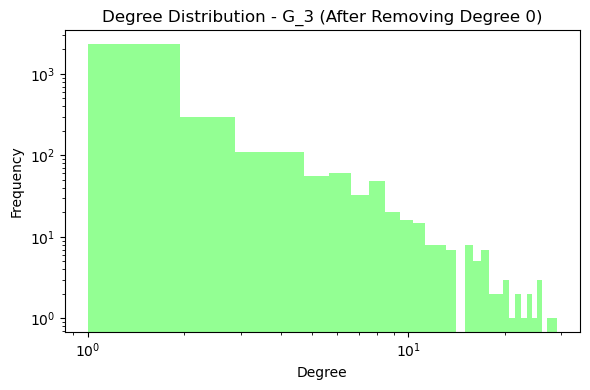

Properties for G_4 after removing nodes with degree 0:
  Node count: 402
  Edge count: 469
  Average degree: 2.3333333333333335
  Density: 0.005818786367414797
  Average clustering coefficient: 0.14746718346994994



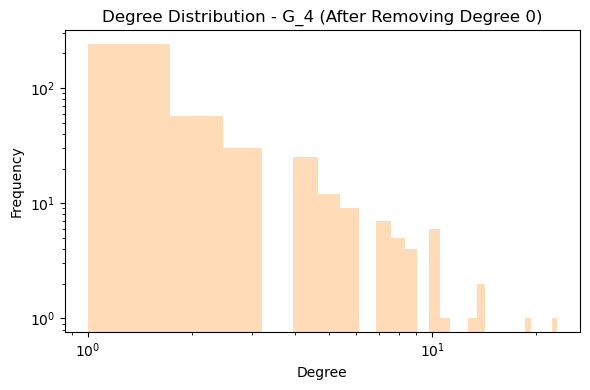

     Node count  Edge count  Average degree   Density  \
G_1     10734.0     13477.0        2.511086  0.000234   
G_2      5287.0      6355.0        2.404010  0.000455   
G_3      3149.0      3247.0        2.062242  0.000655   
G_4       402.0       469.0        2.333333  0.005819   

     Average clustering coefficient  
G_1                        0.033998  
G_2                        0.035416  
G_3                        0.022164  
G_4                        0.147467  


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of graphs and their names
graphs = [("G_1", G_1), ("G_2", G_2), ("G_3", G_3), ("G_4", G_4)]
graph_properties = {}

# Colors for degree distribution plots
colors = ['#FF9999', '#99CCFF', '#66FF66', '#FFCC99']

# Loop through each graph to remove nodes with degree 0, calculate properties, and plot degree distribution
for i, (graph_name, G) in enumerate(graphs):
    # Remove nodes with degree 0
    nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
    G.remove_nodes_from(nodes_to_remove)
    
    # Calculate graph properties after removing nodes with degree 0
    properties = {
        "Node count": G.number_of_nodes(),
        "Edge count": G.number_of_edges(),
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes() if G.number_of_nodes() > 0 else 0,
        "Density": nx.density(G),
    }
    
    # Calculate clustering coefficient if the graph is not a multigraph
    if not isinstance(G, nx.MultiGraph):
        properties["Average clustering coefficient"] = nx.average_clustering(G)
    
    # Store properties for this graph
    graph_properties[graph_name] = properties
    
    # Print properties for each graph
    print(f"Properties for {graph_name} after removing nodes with degree 0:")
    for key, value in properties.items():
        print(f"  {key}: {value}")
    print()
    
    # Degree distribution
    degrees = [d for n, d in G.degree()]
    
    # Plot degree distribution
    plt.figure(figsize=(6, 4))
    plt.hist(degrees, bins=30, color=colors[i % len(colors)], alpha=0.7, log=True)
    plt.title(f'Degree Distribution - {graph_name} (After Removing Degree 0)')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# Convert the graph properties to a DataFrame
properties_df = pd.DataFrame(graph_properties).transpose()
print(properties_df)

# Optionally, save the properties DataFrame to a CSV file
properties_df.to_csv('graph_properties.csv', index=True)

SI model for the base case

In [62]:
initial_infected = [
    node for node, attrs in B.nodes(data=True) 
    if attrs.get('HIV_status', '').lower() == 'positive'
]
print(initial_infected)

[1, 236, 266, 283, 337]


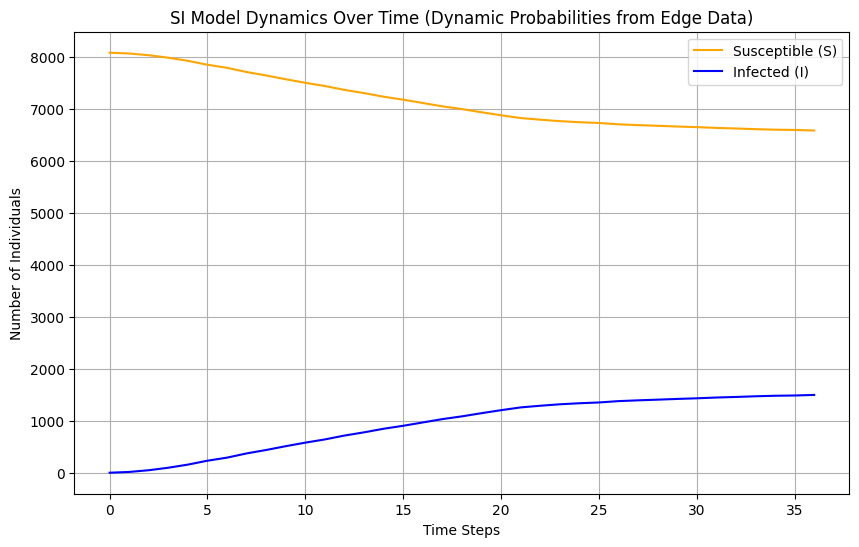

In [61]:
#Important

def si_model_updated(G, initial_infected, steps=15, step_size=30):
    """
    SI model with dynamic probabilities using edge probabilities and cumulative interactions.

    Parameters:
    G: networkx.Graph
        The multilayer graph with 'probability' attributes on edges.
    initial_infected: list
        List of initially infected nodes.
    steps: int
        Number of time steps.
    step_size: int
        Number of days per step (e.g., 30 days = 1 month).

    Returns:
    susceptible_counts, infected_counts: lists
        Counts of susceptible and infected individuals at each time step.
    """
    # Initialize states
    infected = set(initial_infected)
    susceptible = set(G.nodes()) - infected

    # Track counts
    susceptible_counts = [len(susceptible)]
    infected_counts = [len(infected)]

    # Interaction rates per day (for dynamic calculation)
    per_day = 1


    for step in range(steps):
        # Calculate cumulative interaction multipliers
        per_stepsize = step_size * per_day

        # Dynamic probabilities for the current time step
        new_infected = set()

        for node in infected:
            for neighbor in G.neighbors(node):
                if neighbor in susceptible:
                    # Get edge data
                    edge_data = G.get_edge_data(node, neighbor)
                    base_probability = edge_data.get('probability', 0)  # Use edge 'probability'

                    # Adjust probability based on interaction type
                    tietypes = edge_data.get('TIETYPE', [])
                    dynamic_beta = base_probability  # Default to the given probability

                    
                    dynamic_beta = 1 - (1 - base_probability) ** per_stepsize

                    # Infection attempt
                    if np.random.rand() < dynamic_beta:
                        new_infected.add(neighbor)

        # Update states
        infected |= new_infected
        susceptible -= new_infected

        # Track counts
        susceptible_counts.append(len(susceptible))
        infected_counts.append(len(infected))

    return susceptible_counts, infected_counts

# Parameters
steps = 36 
step_size = 30  # 1 month = 30 days

# Initial infected nodes
initial_infected = [
    node for node, attrs in B.nodes(data=True)
    if attrs.get('HIV_status', '').lower() == 'positive'
]

# Run the SI model
susceptible_counts, infected_counts = si_model_updated(
    B, initial_infected, steps, step_size
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(steps + 1), susceptible_counts, label="Susceptible (S)", color="orange")
plt.plot(range(steps + 1), infected_counts, label="Infected (I)", color="blue")
plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SI Model Dynamics Over Time (Dynamic Probabilities from Edge Data)")
plt.legend()
plt.grid()
plt.show()
